<a href="https://colab.research.google.com/github/Jack3690/Kugelblitz/blob/main/Bar_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/Jack3690/Kugelblitz

Cloning into 'Kugelblitz'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 53 (delta 12), reused 36 (delta 4), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [ ]:
cd Kugelblitz/

/content/Kugelblitz


## **SDSS-Marvin**

In [ ]:
!pip install sdss-marvin --quiet

     |████████████████████████████████| 393 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 284 kB 37.0 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 525 kB 39.5 MB/s 
     |████████████████████████████████| 596 kB 37.4 MB/s 
     |████████████████████████████████| 100 kB 9.1 MB/s 
     |████████████████████████████████| 169 kB 52.6 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 41 kB 332 kB/s 
     |████████████████████████████████| 548 kB 51.4 MB/s 
     |████████████████████████████████| 212 kB 44.2 MB/s 
     |████████████████████████████████| 111 kB 47.7 MB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
     |██████████████████████████

### **Configuring Marvin**

In [ ]:
!cp -a sas/ /root/

!cp -a sas/map.py /usr/local/lib/python3.7/dist-packages/marvin/utils/plot/

!mkdir  /root/sas/dr16
!cp -a /root/sas/mangawork/manga/ /root/sas/dr16

In [ ]:
import os
import sys
import requests
import warnings
import PIL
import copy

from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sb
import matplotlib
import numpy as np
from matplotlib import gridspec
import pandas as pd
import marvin.utils.plot.colorbar as colorbar
from matplotlib.colors import ListedColormap
from IPython.display import clear_output

from marvin.tools.maps import Maps
import marvin.utils.plot.map as mapplot
from astropy.table import Table
import astropy.units as u
from astropy.io import ascii
from astropy.wcs import WCS
from astropy.coordinates import Distance
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Planck15
from astropy.io import fits
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
if sys.version_info.major == 2:
    from cStringIO import StringIO as stringio
else:
    from io import StringIO as stringio
    from io import BytesIO as bytesio

matplotlib.rcParams['figure.figsize']=(10,10)
matplotlib.rcParams['font.size']=15

#sb.set_style('dark')

/usr/local/lib/python3.7/dist-packages/marvin/core/exceptions.py:51: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  UserWarning)
[INFO]: No release version set. Setting default to DR15


## **Fast.ai**

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *
from fastbook import *
from torchvision import transforms
from fastai.vision.widgets import *

In [ ]:
path=Path('/content/gdrive/MyDrive')
path.exists()

True

# **ResNet50 Classifier (Fast.ai)**
Work in progess

## **Data**

In [ ]:
cd /content/Kugelblitz/

/content/Kugelblitz


In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp -a data/kaggle.json /root/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import kaggle
import zipfile
import pandas as pd

In [ ]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

  0% 0.00/520k [00:00<?, ?B/s]
100% 520k/520k [00:00<00:00, 35.2MB/s]
100% 4.63M/4.63M [00:00<00:00, 42.4MB/s]

100% 790M/792M [00:09<00:00, 96.9MB/s]
100% 792M/792M [00:09<00:00, 85.9MB/s]
 99% 1.00G/1.01G [00:09<00:00, 109MB/s] 
100% 1.01G/1.01G [00:09<00:00, 110MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 85.0MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 82.8MB/s]


In [ ]:
with zipfile.ZipFile('images_training_rev1.zip','r') as f:
  f.extractall()
with zipfile.ZipFile('training_solutions_rev1.zip','r') as f:
  f.extractall()

In [ ]:
len(os.listdir('images_training_rev1'))

61578

In [ ]:
df_labels = pd.read_csv('training_solutions_rev1.csv')
df_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [ ]:
df_bar = df_labels[ (df_labels['Class1.2']>0.6) &(df_labels['Class2.2']>0.6) & (df_labels['Class3.1']>0.6) & (df_labels['Class6.2']>0.5)]
len(df_bar)

1836

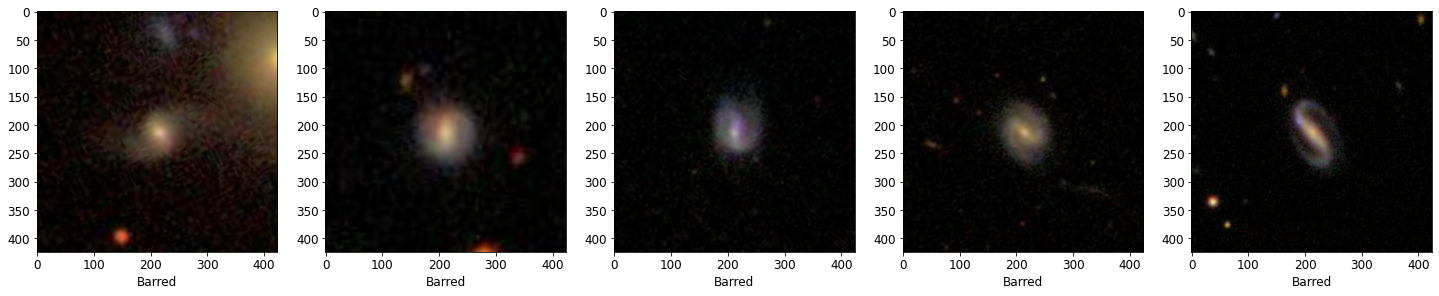

In [ ]:
# Plotting sample images using df_spiral from images_training_rev1/
fig,ax = plt.subplots(1,5, figsize = (25,5))
c = 0
for i in df_bar['GalaxyID'][:5]:
  img = plt.imread(f'images_training_rev1/{i}.jpg')
  ax[c].imshow(img)
  ax[c].set_xlabel('Barred')
  c+=1

In [ ]:
df_nobar = df_labels[(df_labels['Class3.2']>0.8)]
df_edge_on = df_labels[(df_labels['Class2.1']>0.8) & (df_labels['Class6.2']>0.8)]
df_nobar = df_nobar.append(df_edge_on[:600])
len(df_nobar),len(df_edge_on)

(3411, 1365)

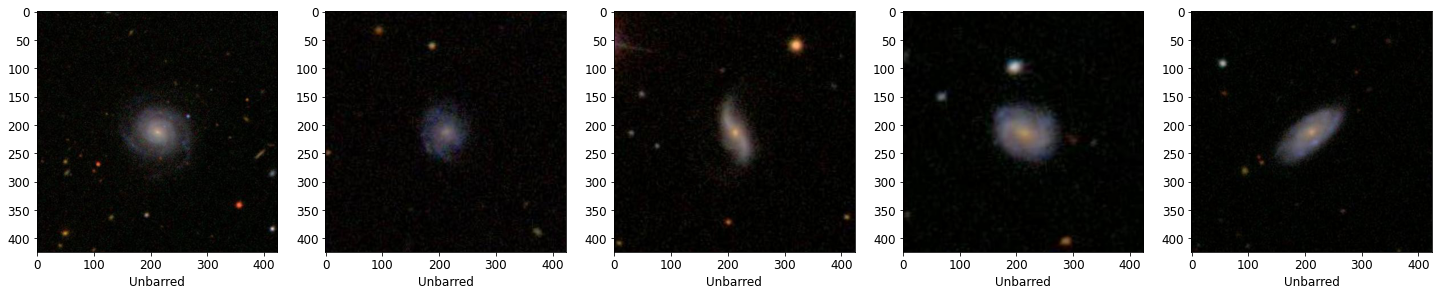

In [ ]:
# Plotting sample images using df_elliptical from images_training_rev1/
fig,ax = plt.subplots(1,5, figsize = (25,5))
c = 0
for i in df_nobar['GalaxyID'][:5]:
  img = plt.imread(f'images_training_rev1/{i}.jpg')
  ax[c].imshow(img)
  ax[c].set_xlabel('Unbarred')
  c+=1

In [ ]:
# Directory containing images based on class
!mkdir morph
!mkdir morph/barred
!mkdir morph/unbarred

In [ ]:
# Copying images from images_training_rev1/ to morph/barred/ using df_bar
for i in df_bar['GalaxyID']:
  os.system(f'cp images_training_rev1/{i}.jpg  morph/barred/')

In [ ]:
# Copying images from images_training_rev1/ to morph/unbarred/ using df_nobar
for i in df_nobar['GalaxyID']:
  os.system(f'cp images_training_rev1/{i}.jpg  morph/unbarred/')

In [ ]:
# Checking number of sources in the directories 'morph/barred' and 'morph/unbarred'
len(os.listdir('morph/barred')), len(os.listdir('morph/unbarred'))

(1836, 3411)

In [ ]:
# Setting path_out to 'morph/'
path_out = Path('morph/')
path_out.exists()

True

## **Model**

In [ ]:
# Creating image block and splitting data into training and validation set. 80% training and 20% validation
galaxy = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y = parent_label,item_tfms=Resize(224))

In [ ]:
# Loading Data
dls = galaxy.dataloaders(path_out,batch_size=32)

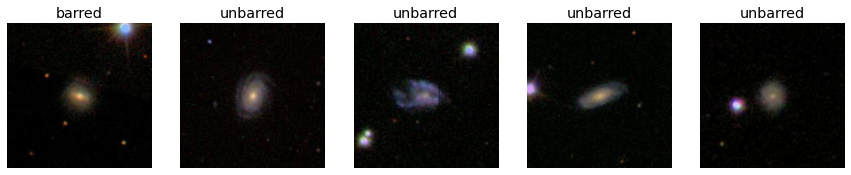

In [ ]:
# Showing validation set
dls.valid.show_batch(max_n=5, nrows=1)

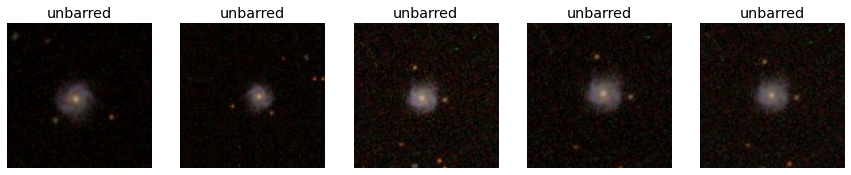

In [ ]:
# Using Data Augmentation and plotting the sample of training batch. Use the settings below for all data augmentation in this module
galaxy = galaxy.new(batch_tfms=aug_transforms(mult=1, flip_vert=True,max_rotate = 360.,max_warp=0,min_zoom=0.8,max_zoom=1.2),item_tfms=RandomResizedCrop(224, min_scale=1))
dls = galaxy.dataloaders(path_out,batch_size=32)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.096909,0.779711,0.645377,01:42
1,1.021542,0.773468,0.696854,01:45
2,0.846621,0.605764,0.736892,01:45
3,0.665945,0.442505,0.795043,01:45
4,0.515216,0.333975,0.860820,01:45
5,0.373393,0.253200,0.902765,01:43
6,0.292165,0.190514,0.923737,01:43
7,0.252830,0.152231,0.941849,01:43
8,0.252743,0.141071,0.944709,01:43
9,0.221493,0.137317,0.948522,01:43


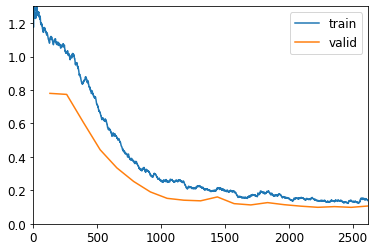

In [ ]:
# Learner with resnet50 architecure with pretrained=True,cbs=ShowGraphCallback,metrics=accuracy
learn = cnn_learner(dls,resnet50,pretrained=True, cbs=ShowGraphCallback,metrics=accuracy)
# Fit using fit_one_cycle with 10 iterations
learn.fit_one_cycle(20)

**Input**

Barred   : 1836

unbarred : 3411 (1365 Edge on)

**Data augmentations**

Rotation : 0 to 360

Flip     : Horizontal and vertical

Contrast : 0.75 to 1.35

Zoom     : 0.8 to 1.2

**Hyperparameters**

Valid fraction : 20%

Batch size     : 32

Iterations     : 20


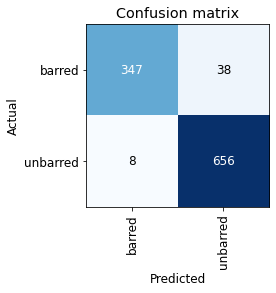

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
cd /content/gdrive/MyDrive/cnn_models

/content/gdrive/MyDrive/cnn_models


In [ ]:
learn.export('export.pkl')

## **Testing Data Acquisation**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
cd /content/Kugelblitz/

/content/Kugelblitz


**Table with MaNGA Galaxies**

In [ ]:
df=pd.read_csv('data/mangaifu.csv')
df=df[df.ifudesignsize>0][["plateifu","mangaid","objra","objdec"]]
df

,plateifu,mangaid,objra,objdec
0,8935-12701,1-404249,194.523424,29.017353
1,7977-12701,1-114955,332.602090,11.713077
2,9494-12701,1-412866,126.910630,21.256855
3,8150-12701,1-389685,146.701430,31.719579
4,9487-12701,1-44618,122.522873,46.193025
...,...,...,...,...
4819,8155-9102,1-202101,53.686515,-1.245784
4820,9042-9102,1-549071,235.032077,28.152265
4821,9870-9102,1-199224,233.165629,43.057807
4822,8719-9102,1-44693,121.744779,46.562969


In [ ]:
if not os.path.exists(path/'mangaifu/'):
  os.mkdir(path/'mangaifu/')
count = 0
not_found = []
for plateifu in df.plateifu:
  count+=1
  if not os.path.exists(path/f'mangaifu/{plateifu}.png'):
    try:
      maps = Maps(plateifu=plateifu,mode='remote')

      sdss_cutout = maps.getImage()
      scale = sdss_cutout.wcs.to_header()['PC2_2']*3600
      size = 2*sdss_cutout.wcs.to_header()['CRPIX1']*scale
      sdss_cutout.get_new_cutout(size,size,scale=size/512)

      sdss_cutout.save(path/f'mangaifu/{plateifu}.png')
    except:
      print(f"\nError for plateifu : {plateifu}")
      not_found.append(plateifu)
  if count%10==0:
    print('.',end='')
  if count%1000==0:
    print(count)
  plt.pause(0.5)

In [ ]:
4824 - len(os.listdir(path/'mangaifu'))

128

# **Pretained Model**

In [ ]:
path/'cnn_models'

Path('/content/gdrive/MyDrive/cnn_models')

In [ ]:
learn2 = load_learner(path/'cnn_models/export.pkl')

In [ ]:
learn2.dls.vocab

['barred', 'unbarred']

# **Test Data**

In [ ]:
image_path = get_image_files(path/'mangaifu/')

In [ ]:
len(image_path)

4696

In [ ]:
# Dict object to store data
barclass = {
    'barred'  : [],
    'unbarred': [],
}
count=0
for img in image_path[:100]:
  # Loading and classifying image
  c,i,p=learn2.predict(img)
  # Appening data to dict 
  barclass[c].append([img.name[:-4],p[i].numpy().item()])
  count+=1
  if count%100==0:
    print(count)
    break
print(count)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


100
100


In [ ]:
bar=pd.DataFrame(barclass['barred'],columns=['plateifu','prob'])
nobar=pd.DataFrame(barclass['unbarred'],columns=['plateifu','prob'])

In [ ]:
bar.to_csv(path/'manga_bar.csv')
nobar.to_csv(path/'manga_unbarred.csv')

In [ ]:
print("Number of barred galaxies :",bar.count()[0])
print("Number of unbarred galaxies :",nobar.count()[0])
print("Total :",bar.count()[0]+nobar.count()[0])

Number of barred galaxies : 39
Number of unbarred galaxies : 61
Total : 100


In [ ]:
bar

In [ ]:
learn2.arch

<function torchvision.models.resnet.resnet50>

# **Saliency Map**

In [ ]:
!pip install captum

In [ ]:
import captum as cp

In [ ]:
from captum.attr import (
    IntegratedGradients,
    NoiseTunnel
)

In [ ]:
class SaliencyMap():
  def __init__(self,model,path):
    self.model = model
    self.image_path = path
    self.image = Image.open(self.image_path)
    data = transforms.ToTensor()(self.image).unsqueeze(0)
    mean = data.mean(axis=[0,2,3])
    std = data.std(axis=[0,2,3])
    self.tfms = transforms.Compose([transforms.Resize(224),transforms.Normalize(mean,std)])
    self.attributions = None
    self.data = self.tfms(data)

  def __call__(self,target,N=1,std=0.02):
    self.baseline = torch.zeros(self.data.shape)
    self.model.eval()
    ig = IntegratedGradients(self.model)
    attributions, delta = ig.attribute(self.data, self.baseline, target=target, return_convergence_delta=True)
    nt = NoiseTunnel(ig)
    self.attributions, self.delta = nt.attribute(self.data, nt_type='smoothgrad', stdevs=std, nt_samples=N,baselines=self.baseline, target=target, return_convergence_delta=True)
    self.N = N
    self.std = std
    
    return self.attributions, self.delta 
  
  def plot(self):
    if self.attributions is not None:
      data = self.attributions.permute(0,2,3,1).squeeze().cpu().numpy()
      data[:,:,0] = (data[:,:,0] - data[:,:,0].min())/(data[:,:,0].max()-data[:,:,0].min())
      data[:,:,1] = (data[:,:,1] - data[:,:,1].min())/(data[:,:,1].max()-data[:,:,1].min())
      data[:,:,2] = (data[:,:,2] - data[:,:,2].min())/(data[:,:,2].max()-data[:,:,2].min())
      fig,ax = plt.subplots(1,2,figsize=(10,30))
      ax[0].imshow(self.image)
      ax[0].set_title('Input')
      ax[1].imshow(data)
      ax[1].set_title(f'SmoothGrad N = {self.N} '+ r'$\sigma$ = '+ f'{self.std}')


In [ ]:
img_path = path/'mangaifu/8549-6103.png'
Map = SaliencyMap(learn2.model,img_path)

In [ ]:
attributions,delta = Map(N=2,target=0)

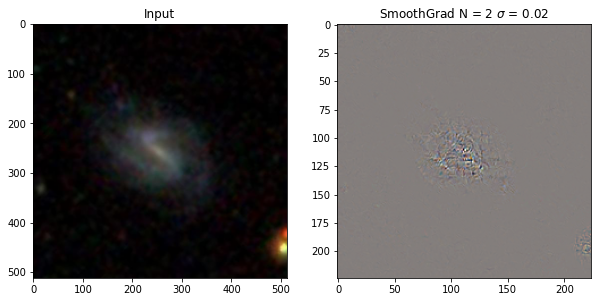

In [ ]:
Map.plot()

In [ ]:
Map.data.shape

torch.Size([1, 3, 224, 224])

In [ ]:
SM = torch.sum(attributions,axis=(1))
prod = (SM*Map.data).sum(axis=1).squeeze()

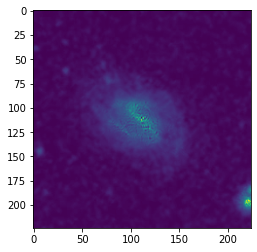

In [ ]:
plt.imshow(prod)

In [ ]:
y,x = torch.where(attributions[0][0]<0.5)

In [ ]:
from scipy.stats import pearsonr

In [ ]:
corr, _ = pearsonr(x, y)

In [ ]:
corr

0.7582111272323168